<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math for 8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [3]:
df = pd.read_csv('states_edu.csv')

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [4]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [5]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [6]:
##Makes sure all rows have an 8th grade math score
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

In [7]:
##Fills in enrollments
df.ENROLL_ALL.isna().sum()
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df.ENROLL_PREK+df.ENROLL_PRIMARY+df.ENROLL_HS)
df[df.ENROLL_ALL.isna()][['ENROLL_PREK','ENROLL_PRIMARY','ENROLL_HS','ENROLL_ALL_EST']].notna().any()
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

In [7]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [29]:
##Creates df's with new state regions
df_new_england = df[df['STATE']=='MASSACHUSETTS']
states_of_interest = ['MAINE','NEW HAMSHIRE','VERMONT','CONNETICUT','RHODE ISLAND']
for state in states_of_interest:
    df_new_england = pd.concat([df[df['STATE']==state], df_new_england], axis=0)

df_mid_atlantic = df[df['STATE']=='NEW YORK']
states_of_interest = ['NEW JERSEY','PENNSYLVANIA']
for state in states_of_interest:
    df_mid_atlantic = pd.concat([df[df['STATE']==state], df_mid_atlantic], axis=0)
    
df_west_south_central = df[df['STATE']=='MARYLAND']
states_of_interest = ['WEST VIRGINIA','VIRGINIA','NORTH CAROLINA', 'KENTUCKY', 'GEORGIA','FLORIDA','SOUTH CAROLINA','MISSISSIPPI','TENNESSEE']
for state in states_of_interest:
    df_west_south_central = pd.concat([df[df['STATE']==state], df_west_south_central], axis=0)
    
df_east_south_central = df[df['STATE']=='TEXAS']
states_of_interest = ['ARKANSAS','OKLAHOMA','LOUISIANA']
for state in states_of_interest:
    df_east_south_central = pd.concat([df[df['STATE']==state], df_east_south_central], axis=0)
    
df_west_north_central = df[df['STATE']=='MICHIGAN']
states_of_interest = ['WISCONSIN','OHIO','INDIANA','ILLINOIS']
for state in states_of_interest:
    df_west_north_central = pd.concat([df[df['STATE']==state], df_west_north_central], axis=0)
    
df_east_north_central = df[df['STATE']=='IOWA']
states_of_interest = ['NEBRASKA','MISSOURI','KANSAS','MINNESOTA','NORTH DAKOTA','SOUTH DAKOTA']
for state in states_of_interest:
    df_east_north_central = pd.concat([df[df['STATE']==state], df_east_north_central], axis=0)
    
df_mountain_west = df[df['STATE']=='NEW MEXICO']
states_of_interest = ['COLORADO','ARIZONA','UTAH','NEVADA','WYOMING','IDAHO','MONTANA']
for state in states_of_interest:
    df_mountain_west = pd.concat([df[df['STATE']==state], df_mountain_west], axis=0)

df_pacific_west = df[df['STATE']=='CALIFORNIA']
states_of_interest = ['WASHINGTON','OREGON','UTAH','ALASKA','HAWAII']
for state in states_of_interest:
    df_pacific_west = pd.concat([df[df['STATE']==state], df_pacific_west], axis=0)

In [30]:
##Labels EACH
df[state]['REGION'] = 'NEW ENGLAND'
df_mid_atlantic['REGION'] = 'MID ATLANTIC'
df_west_south_central['REGION'] = 'WEST SOUTH CENTRAL'
df_west_south_central['REGION'] = 'EAST SOUTH CENTRAL'
df_west_north_central['REGION'] = 'WEST NORTH CENTRAL'
df_east_north_central['REGION'] = 'EAST NORTH CENTRAL'
df_mountain_west['REGION'] = 'MOUNTAIN WEST'
df_pacific_west['REGION'] = 'PACIFIC WEST'

In [69]:
##Reaggregates
new_df = df_new_england
regions = [df_mid_atlantic, df_west_south_central,df_west_south_central,df_west_north_central,df_east_north_central,df_mountain_west,df_pacific_west]
for region in regions:
    new_df = pd.concat([region, new_df], axis=0)
new_df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
new_df['%_REVENUE_TOWARDS_STUDENTS'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['TOTAL_REVENUE']
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df['%_REVENUE_TOWARDS_STUDENTS'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['TOTAL_REVENUE']

Final feature list: **<Looking specifically at REGIONS Data\>**

Feature selection justification: **<Made region df's to analyze and reaggreate data. Since will be largely looking at region as whole, created a weighted column (scores * student_enrol) to better represent each states impact on region. Also created a region column.\>**

<h2> EDA </h2>

Visualization 1

In [11]:
import seaborn as sns

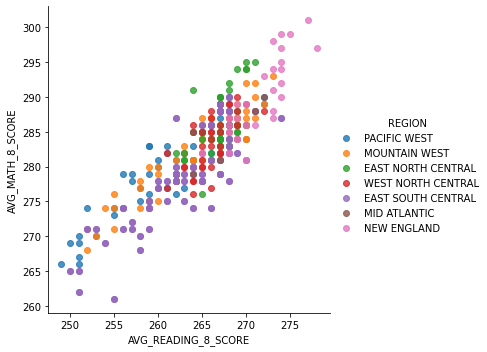

In [67]:
sns.lmplot(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', hue='REGION', 
           data=new_df, fit_reg=False)

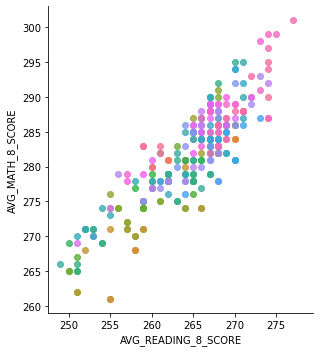

In [71]:
sns.lmplot(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', hue='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', 
           data=new_df, fit_reg=False)._legend.remove()

Plots average reading scored vs average math scores, with coloring to indiciate revenue expenditure per student

Visualization 2

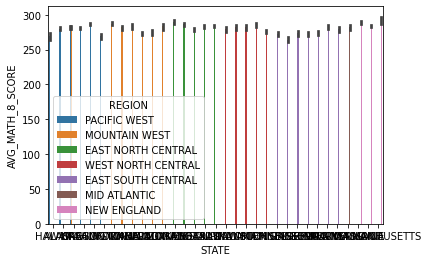

In [64]:
sns.barplot(x="STATE", y="AVG_MATH_8_SCORE", data=new_df, hue='REGION')

States colored with regions who are paying the most per student's education

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# X = new_df[['YEAR', 'AVG_READING_4_SCORE', 'AVG_MATH_4_SCORE']]

# y = new_df['AVG_MATH_8_SCORE']
X = df[['%_REVENUE_TOWARDS_STUDENTS']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [75]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestCentroid
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()

In [76]:
# create your model here
model = LinearRegression()

In [77]:
model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'MATH 8 score')

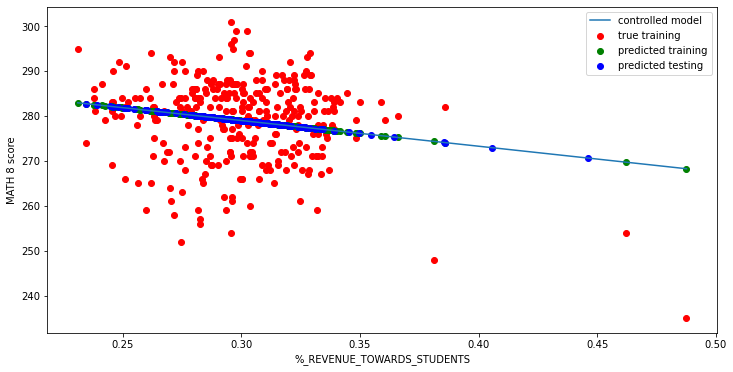

In [80]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = '%_REVENUE_TOWARDS_STUDENTS'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),100)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('MATH 8 score')

In [82]:
np.mean(np.abs(model.predict(X_test)-y_test))

12.363636363636363

<h2> Summary </h2>

**<Based off the results of the 'data science crash course module, I wondered about the correlation found between the revenue_expenditure and academic performance. While revenue_expenditure was found to be positively related to academic performance, this could be due to a number of reasons. The first obviosly being more money spent = higher performance. A second one could be that we just see higher spending on education by states that care about education, and the constituents and residents of that state in turn care more about education and thus students are raised by their parents to be better students. This analysis questions that possibility in this result.
In this a regresssion is run determing the relation between the % of revenue and academic performance(in this case 8th grade math score). This work operates under the assumption that states that care more about education will in turn spend a greater portion of revenue on education. It is found that there is almost no relation with a regression mean error of 12.36, so if the previous assumption is in part correct. \>**